In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hexagon_utilities import *
import matplotlib.pyplot as plt

### Create ColorLists for Use.

Named colors are useful.

In [6]:
import matplotlib.colors as mcolors
colors_d = mcolors.CSS4_COLORS
# Sort colors by hue, saturation, value and name
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))), name)
                for name, color in colors_d.items())
mcolor_names = [name for hsv, name in by_hsv] #pluck the names, sorted by HSV



BLACK_WHITES = mcolor_names[:13]
RED_BROWNS = mcolor_names[14:29]
BROWNS = mcolor_names[29:36]
BEIGES = mcolor_names[36:49]
YELLOWS = mcolor_names[50:64]
GREENS = mcolor_names[64:81]
CYANS = mcolor_names[85: 99]
BLUES = mcolor_names[100:121]
PURPLES = mcolor_names[122:132]
PINKS = mcolor_names[132:145]

red_inds = [21, 22, 23, 24, 25, 26, 27, 145]
REDS = [mcolor_names[x] for x in red_inds]


color_sets = [REDS, PINKS, PURPLES, BLUES, CYANS, GREENS, YELLOWS, BEIGES, BROWNS, RED_BROWNS, BLACK_WHITES]

In [4]:
by_hsv

[((0.0, 0.0, 0.0), 'black'),
 ((0.0, 0.0, 0.4117647058823529), 'dimgray'),
 ((0.0, 0.0, 0.4117647058823529), 'dimgrey'),
 ((0.0, 0.0, 0.5019607843137255), 'gray'),
 ((0.0, 0.0, 0.5019607843137255), 'grey'),
 ((0.0, 0.0, 0.6627450980392157), 'darkgray'),
 ((0.0, 0.0, 0.6627450980392157), 'darkgrey'),
 ((0.0, 0.0, 0.7529411764705882), 'silver'),
 ((0.0, 0.0, 0.8274509803921568), 'lightgray'),
 ((0.0, 0.0, 0.8274509803921568), 'lightgrey'),
 ((0.0, 0.0, 0.8627450980392157), 'gainsboro'),
 ((0.0, 0.0, 0.9607843137254902), 'whitesmoke'),
 ((0.0, 0.0, 1.0), 'white'),
 ((0.0, 0.019607843137254943, 1.0), 'snow'),
 ((0.0, 0.23936170212765961, 0.7372549019607844), 'rosybrown'),
 ((0.0, 0.4666666666666667, 0.9411764705882353), 'lightcoral'),
 ((0.0, 0.551219512195122, 0.803921568627451), 'indianred'),
 ((0.0, 0.7454545454545455, 0.6470588235294118), 'brown'),
 ((0.0, 0.8089887640449438, 0.6980392156862745), 'firebrick'),
 ((0.0, 1.0, 0.5019607843137255), 'maroon'),
 ((0.0, 1.0, 0.5450980392156862

In [5]:
def save_file(title=None, details=None):
    SAVE_FILE = True
    if SAVE_FILE:
        fn = ''
        if title is not None:
            fn += title
            
        if details is not None:
            fn+= details
            
        dtstr = datetime.now().strftime("%Y-%m-%d_%H-%M-%S_%p")

            
        plt.savefig(f'../images/{fn+dtstr}.jpg')

In [6]:
def label(xy, text):
    y = xy[1] - 0.15  # shift y-value for label so that it's below the artist
    plt.text(xy[0], y, text, ha="center", family='sans-serif', size=10)

(-5.475, 4.975, -2.8578838324886475, 2.8578838324886475)

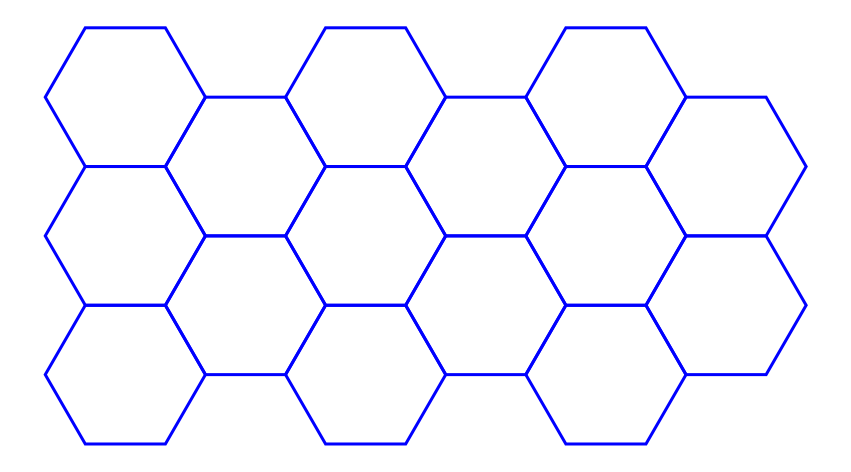

In [13]:
fig, ax = plt.subplots(figsize=(15,15))

#color_size_dict = {'blue': 0.9, 'red': 0.8, 'black': 0.6, 'white': 0.2}
hg = HexGrid(5,3,1, flat=True)

for idx, h in enumerate(hg.hlist):
    h.render(fill=None, lw=3, color='blue')
    
ax.axis('scaled')
plt.axis('off')

In [19]:
??h.v_connect

(-5.475, 4.975, -2.8578838324886475, 2.8578838324886475)

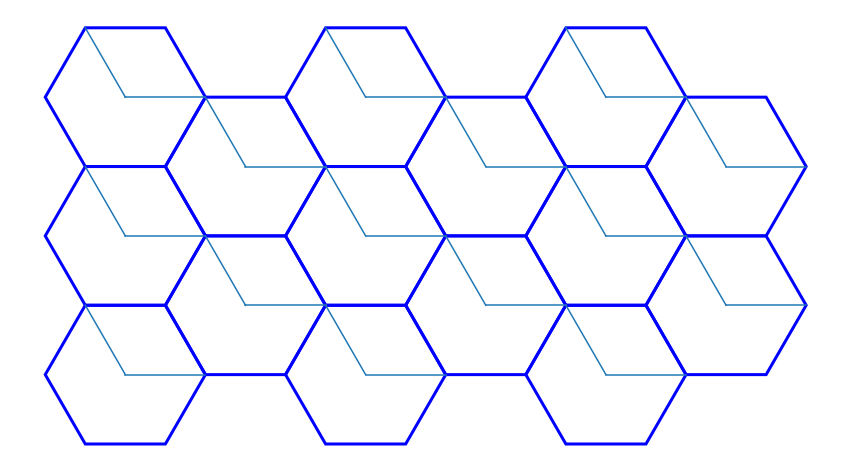

In [17]:
fig, ax = plt.subplots(figsize=(15,15))

#color_size_dict = {'blue': 0.9, 'red': 0.8, 'black': 0.6, 'white': 0.2}
hg = HexGrid(5,3,1, flat=True)

for idx, h in enumerate(hg.hlist):
    h.render(fill=None, lw=3, color='blue')
    h.render_spokes([0,2])
    
ax.axis('scaled')
plt.axis('off')

[(0, 2), (1, 3), (2, 4), (3, 5), (4, 0), (5, 1)]

(-5.475, 4.975, -2.8578838324886475, 2.8578838324886475)

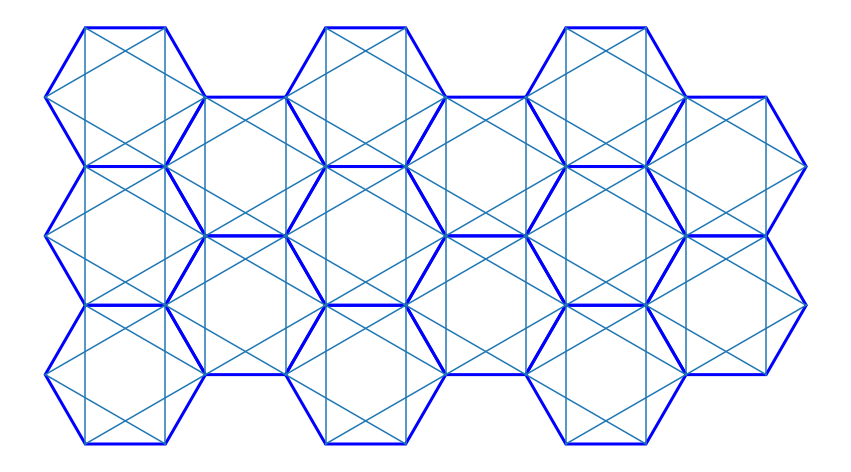

In [31]:
fig, ax = plt.subplots(figsize=(15,15))

hg = HexGrid(5,3,1, flat=True)

v_pairs = [(x, (x+2)%6) for x in range(6)]

for idx, h in enumerate(hg.hlist):
    h.render(fill=None, lw=3, color='blue')
    h.v_connect(v_pairs)
    
ax.axis('scaled')
plt.axis('off')

(-4.325, 2.825, -1.0392304845413265, 2.7712812921102037)

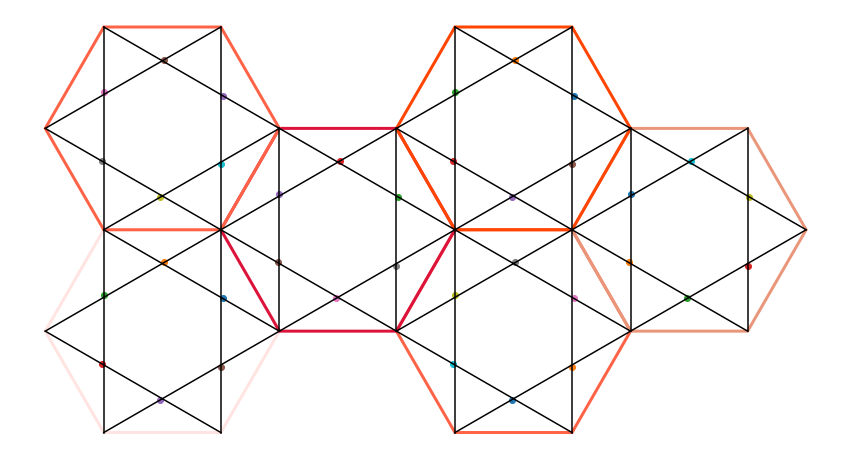

In [89]:
fig, ax = plt.subplots(figsize=(15,15))

hg = HexGrid(3,2,1, flat=True)

v_pairs = [(x, (x+2)%6) for x in range(6)]
dist = sqrt(size**2 + (size/2)**2)

for idx, h in enumerate(hg.hlist):
    h.render(fill=None, lw=3, color=np.random.choice(REDS))
    h.v_connect(v_pairs, color='black')
    for ai in range(6):
        plt.scatter(
        h.verts[ai].x + dist/2 * sin((-60*(ai+1)+0)*PI/180),
        h.verts[ai].y + dist/2 * cos((-60*(ai+1)+0)*PI/180)
        )    

        
ax.axis('scaled')
plt.axis('off')

(-1.1, 1.1, -0.9526279441628827, 0.9526279441628827)

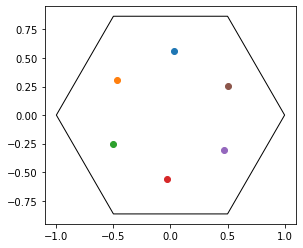

In [94]:
h = Hex(0,0, size=1)
h.get_verts()
h.render(fill=None)

pts = h.get_points_vert_rtheta(dist, 0 )

for p in pts:
    plt.scatter(*p)

plt.axis('scaled')

### Example Usage of `get_points_vert_rtheta()`

This is a very useful function when you want to get 6 points, equidistant and at the same angle from the 6 vertices.

(-1.1, 1.1, -0.9526279441628827, 0.9526279441628827)

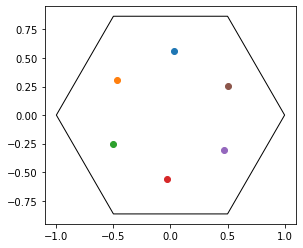

In [94]:
h = Hex(0,0, size=1)
h.get_verts()
h.render(fill=None)

pts = h.get_points_vert_rtheta(dist, 0 )

for p in pts:
    plt.scatter(*p)

plt.axis('scaled')

(-1.1, 1.1, -0.9526279441628827, 0.9526279441628827)

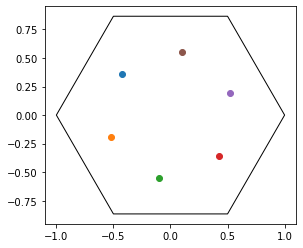

In [97]:
h = Hex(0,0, size=1)
h.get_verts()
h.render(fill=None)

pts = h.get_points_center_rtheta(dist/2, 10 )

for p in pts:
    plt.scatter(*p)

plt.axis('scaled')

(-1.1, 1.1, -1.1800113942344606, 1.1792859231347987)

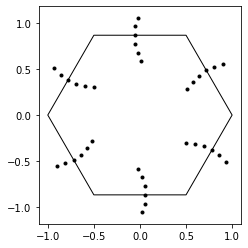

In [103]:
h = Hex(0,0, size=1)
h.get_verts()
h.render(fill=None)

for angle in range(0, 60, 10):
    pts = h.get_points_vert_rtheta(dist/2, angle )
    for p in pts:
        plt.scatter(*p, color='k', marker='.')

plt.axis('scaled')

(-7.775, 9.275, -2.9011851026778697, 3.767210506462308)

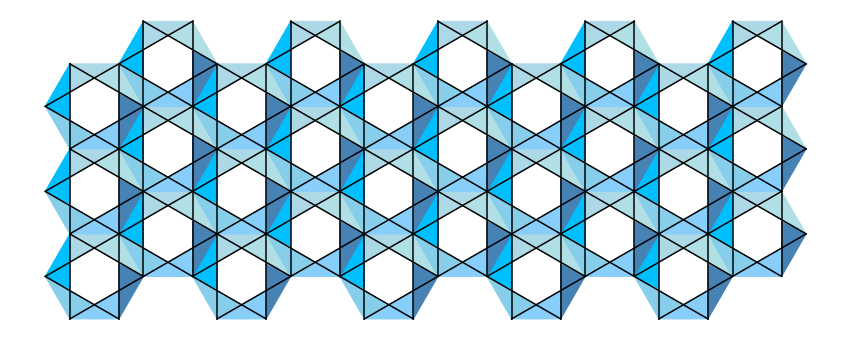

In [7]:
fig, ax = plt.subplots(figsize=(15,15))

size=1
hg = HexGrid(6,5,size, flat=True)

v_pairs = [(x, (x+2)%6) for x in range(6)]
dist = sqrt(size**2 + (size/2)**2)

for idx, h in enumerate(hg.hlist):
    #h.render(fill=None, lw=3, color=np.random.choice(REDS))
    h.v_connect(v_pairs, color='black')
    
    #get hold of the points wherein the Line vertices-v1-v3 interesects with the line v2-v4
    pts = h.get_points_vert_rtheta(dist, 0)
    
    for v in range(6):
        h.render_polygon([v, pts[v], (v+1)%6], include_center=False, color=BLUES[v])
    
        
ax.axis('scaled')
plt.axis('off')